### Gaussian_Process: Regression

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime

#### Download the SolarPrediction.csv dataset from https://www.kaggle.com/dronio/SolarEnergy
#### Print its head()

In [347]:
# TODO
df_solar_energy = pd.read_csv("SolarPrediction.csv")

In [348]:
df_solar_energy.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,9/29/2016 12:00:00 AM,23:55:26,1.21,48,30.46,59,177.39,5.62,06:13:00,18:13:00
1,1475229023,9/29/2016 12:00:00 AM,23:50:23,1.21,48,30.46,58,176.78,3.37,06:13:00,18:13:00
2,1475228726,9/29/2016 12:00:00 AM,23:45:26,1.23,48,30.46,57,158.75,3.37,06:13:00,18:13:00
3,1475228421,9/29/2016 12:00:00 AM,23:40:21,1.21,48,30.46,60,137.71,3.37,06:13:00,18:13:00
4,1475228124,9/29/2016 12:00:00 AM,23:35:24,1.17,48,30.46,62,104.95,5.62,06:13:00,18:13:00


#### Explore the dataset. 
#### Drop the unnecessary columns, if any.

In [349]:
# TODO
len(df_solar_energy)

32686

We can ommit 12:00:00 AM from Data columns as they are the same everywhere and simplify.

In [350]:
for d in df_solar_energy["Data"]:
    if d[-11:] != "12:00:00 AM":
        print("Does not have similar info.", d)

In [351]:
new_date_values = []
for i in range(len(df_solar_energy)):
    new_date_values.append(df_solar_energy["Data"].iloc[i][:-12])

df_solar_energy["Data"] = new_date_values

In [352]:
df_solar_energy["Data"]

0        9/29/2016
1        9/29/2016
2        9/29/2016
3        9/29/2016
4        9/29/2016
           ...    
32681    12/1/2016
32682    12/1/2016
32683    12/1/2016
32684    12/1/2016
32685    12/1/2016
Name: Data, Length: 32686, dtype: object

In [353]:
df_solar_energy.cov()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,9.030245e+12,-7.716789e+07,-6.879355e+06,-54548.472156,-4.929503e+06,3.814116e+07,1.823619e+06
Radiation,-7.716789e+07,9.980316e+04,1.439811e+03,2.055656,-1.857027e+03,-6.051515e+03,8.118818e+01
Temperature,-6.879355e+06,1.439811e+03,3.845435e+01,0.105499,-4.594215e+01,-1.337925e+02,-6.809108e-01
Pressure,-5.454847e+04,2.055656e+00,1.054993e-01,0.002989,-3.182587e-01,-1.041315e+00,-1.596132e-02
Humidity,-4.929503e+06,-1.857027e+03,-4.594215e+01,-0.318259,6.754915e+02,-3.962786e+00,-1.919811e+01
WindDirection(Degrees),3.814116e+07,-6.051515e+03,-1.337925e+02,-1.041315,-3.962786e+00,6.916833e+03,2.121829e+01
Speed,1.823619e+06,8.118818e+01,-6.809108e-01,-0.015961,-1.919811e+01,2.121829e+01,1.218341e+01


In [354]:
df_solar_energy.corr()

,UNIXTime,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,1.000000,-0.081286,-0.369169,-0.332016,-0.063117,0.152613,0.173860
Radiation,-0.081286,1.000000,0.734955,0.119016,-0.226171,-0.230324,0.073627
Temperature,-0.369169,0.734955,1.000000,0.311173,-0.285055,-0.259421,-0.031458
Pressure,-0.332016,0.119016,0.311173,1.000000,-0.223973,-0.229010,-0.083639
Humidity,-0.063117,-0.226171,-0.285055,-0.223973,1.000000,-0.001833,-0.211624
WindDirection(Degrees),0.152613,-0.230324,-0.259421,-0.229010,-0.001833,1.000000,0.073092
Speed,0.173860,0.073627,-0.031458,-0.083639,-0.211624,0.073092,1.000000


from corrolation matrix we see that more or less the data features are dependent on each other, so I decide to not drop any columns.

#### Convert the Data (If did not drop), Time, TimeSunRise, TimeSunSet columns to datetime

In [355]:
# TODO
for date_col in ["Data", "Time", "TimeSunRise", "TimeSunSet"]:
    df_solar_energy[date_col] = pd.to_datetime(df_solar_energy[date_col])

In [356]:
df_solar_energy.head()

,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,1475229326,2016-09-29,2022-01-28 23:55:26,1.21,48,30.46,59,177.39,5.62,2022-01-28 06:13:00,2022-01-28 18:13:00
1,1475229023,2016-09-29,2022-01-28 23:50:23,1.21,48,30.46,58,176.78,3.37,2022-01-28 06:13:00,2022-01-28 18:13:00
2,1475228726,2016-09-29,2022-01-28 23:45:26,1.23,48,30.46,57,158.75,3.37,2022-01-28 06:13:00,2022-01-28 18:13:00
3,1475228421,2016-09-29,2022-01-28 23:40:21,1.21,48,30.46,60,137.71,3.37,2022-01-28 06:13:00,2022-01-28 18:13:00
4,1475228124,2016-09-29,2022-01-28 23:35:24,1.17,48,30.46,62,104.95,5.62,2022-01-28 06:13:00,2022-01-28 18:13:00


#### Generate Cyclical features from newly generated datetime objects
#### link for help: https://www.kaggle.com/avanwyk/encoding-cyclical-features-for-deep-learning?scriptVersionId=3208521&cellId=21

In [357]:
# TODO
df_datetime = df_solar_energy[["Data", "Time", "TimeSunRise", "TimeSunSet", "UNIXTime"]]

In [358]:
def plot_datetime_column_info(column):
    # create 6 subplots
    date_time_comps = [column.dt.year, column.dt.month, column.dt.day, 
                       column.dt.hour, column.dt.minute, column.dt.second]
    labels = ["year", "month", "day", "hour", "minute", "second"]
    fig = plt.figure(figsize=(25, 5))
    ax = fig.subplots(1, 6)
    for i, comp, l in zip(range(6), date_time_comps, labels):
        ax[i].plot(comp)
        ax[i].set_title(l)

**In "Data" column**, only month and day vary.

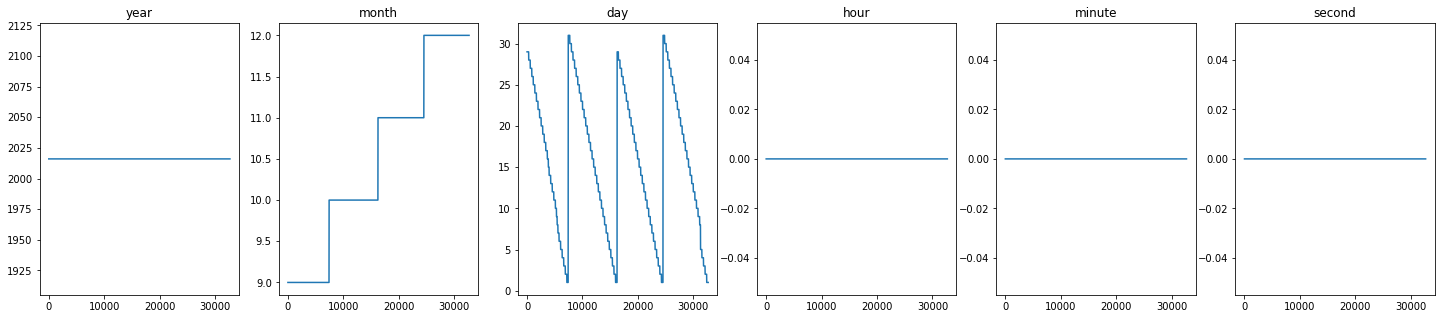

In [359]:
plot_datetime_column_info(df_datetime["Data"])

**Column Time**

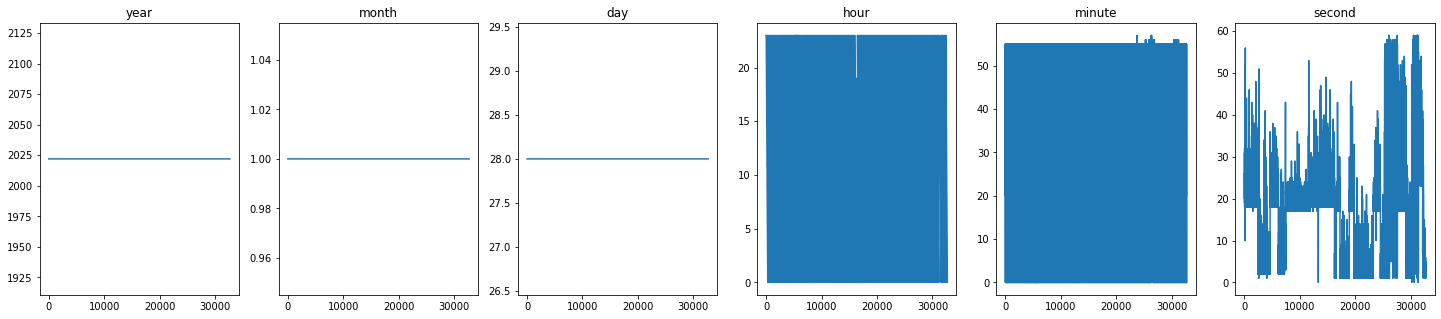

In [360]:
plot_datetime_column_info(df_datetime["Time"])

Hour and minute are cyclical.

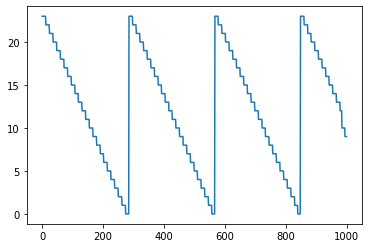

In [361]:
time_hour_sample = df_datetime["Time"].dt.hour[:1000]
plt.plot(time_hour_sample)

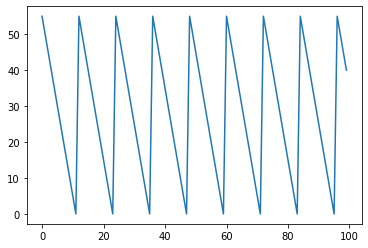

In [362]:
time_hour_sample = df_datetime["Time"].dt.minute[:100]
plt.plot(time_hour_sample)

**Column TimeSunRise**

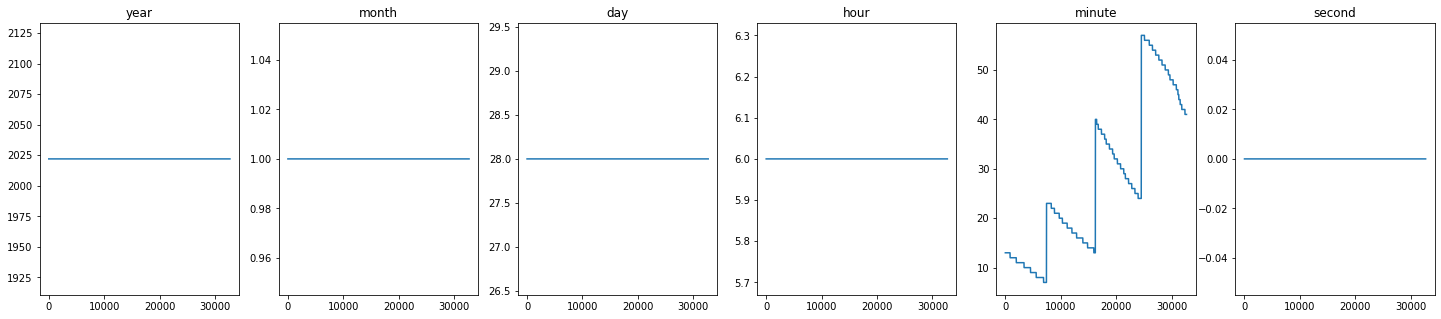

In [363]:
plot_datetime_column_info(df_datetime["TimeSunRise"])

**Column TimeSunSet**

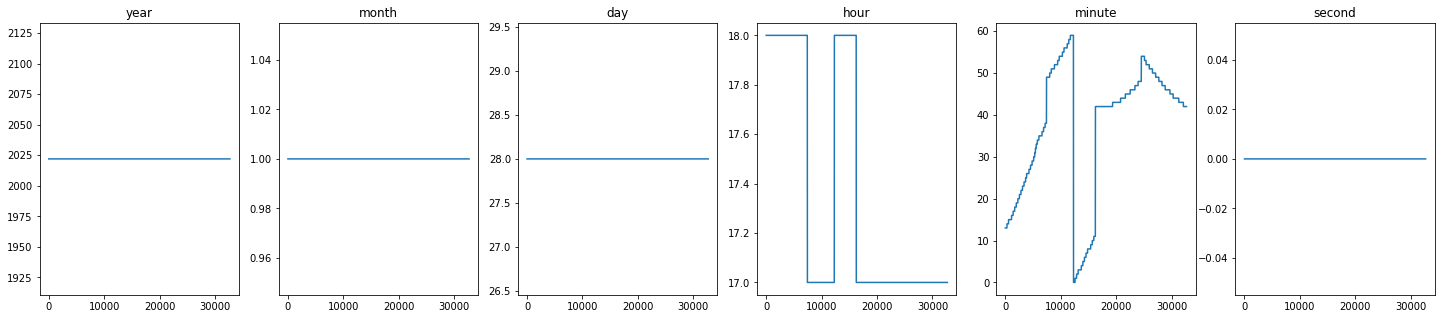

In [364]:
plot_datetime_column_info(df_datetime["TimeSunSet"])

We can generate cyclical features from meaningfull datetime data components.

In [365]:
df_new_datetime = pd.DataFrame()

In [366]:
# data - month
data_month = df_datetime["Data"].dt.month
data_month.unique()

array([ 9, 10, 11, 12])

In [367]:
# TimeSunSet - day
timesunset_day = df_datetime["TimeSunSet"].dt.hour
timesunset_day.unique()

array([18, 17])

In [368]:
# one hot encoding since it had only four values
for i, val in zip(data_month.unique(), pd.get_dummies(data_month).T.values):
    df_new_datetime[f"DataMonth{i}"] = val

In [369]:
# one hot encoding since it had only four values
for i, val in zip(timesunset_day.unique(), pd.get_dummies(timesunset_day).T.values):
    df_new_datetime[f"TimeSunSetHour{i}"] = val

In [370]:
df_new_datetime.head()

,DataMonth9,DataMonth10,DataMonth11,DataMonth12,TimeSunSetHour18,TimeSunSetHour17
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1


For other datetime components we will use these formulas.

$$
    x_{sin}=sin(\frac{2πx}{max(x)})
$$

$$
    x_{cos}=cos(\frac{2πx}{max(x)})
$$

In [371]:
def cyclical(series, func):
    return func((2 * np.pi * series)/(series.max()))

In [372]:
data_day = data_month = df_datetime["Data"].dt.day

In [373]:
data_day_sin = cyclical(data_day, np.sin)
data_day_cos = cyclical(data_day, np.cos)

Only sin taken alone has some problems. So we take both sin and cos.

<AxesSubplot:>

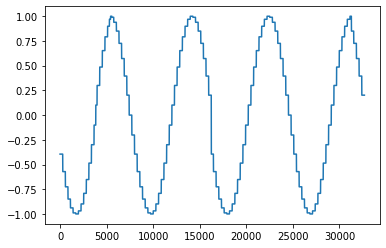

In [374]:
data_day_sin.plot()

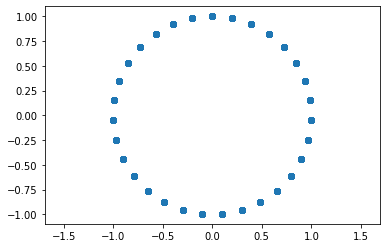

In [375]:
plt.scatter(data_day_sin, data_day_cos)
plt.axis('equal')
plt.show()

In [376]:
df_new_datetime["DataDaySin"] = data_day_sin
df_new_datetime["DataDayCos"] = data_day_cos

We do it for all other meaningfull datetime components in the data.

In [377]:
df_new_datetime["TimeHourSin"] = cyclical(df_datetime["Time"].dt.hour, np.sin)
df_new_datetime["TimeHourCos"] = cyclical(df_datetime["Time"].dt.hour, np.cos)

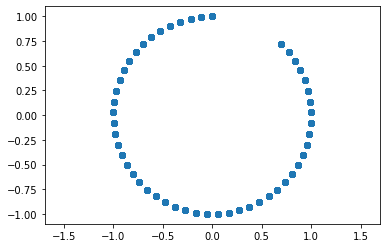

In [378]:
plt.scatter(cyclical(df_datetime["TimeSunRise"].dt.minute, np.sin), 
           cyclical(df_datetime["TimeSunRise"].dt.minute, np.cos))
plt.axis("equal")
plt.show()

In [379]:
df_new_datetime["TimeSunRiseHourSin"] = cyclical(df_datetime["TimeSunRise"].dt.minute, np.sin)
df_new_datetime["TimeSunRiseHourCos"] = cyclical(df_datetime["TimeSunRise"].dt.minute, np.cos)

In [380]:
df_new_datetime["UNIXTimeSin"] = cyclical(df_datetime["UNIXTime"], np.sin)
df_new_datetime["UNIXTimeCos"] = cyclical(df_datetime["UNIXTime"], np.cos)

In [381]:
df_new_datetime.head()

,DataMonth9,DataMonth10,DataMonth11,DataMonth12,TimeSunSetHour18,TimeSunSetHour17,DataDaySin,DataDayCos,TimeHourSin,TimeHourCos,TimeSunRiseHourSin,TimeSunRiseHourCos,UNIXTimeSin,UNIXTimeCos
0,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034031,0.999421
1,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034032,0.999421
2,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034033,0.999421
3,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034035,0.999421
4,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034036,0.999421


In [382]:
df_solar_energy = pd.concat([df_solar_energy, df_new_datetime], axis=1)

#### Remove the redundunt features

Now that we made datetime features cyclical we can remove the original features.

In [383]:
# TODO
df_solar_energy.pop("UNIXTime")
df_solar_energy.pop("Time")
df_solar_energy.pop("Data")
df_solar_energy.pop("TimeSunRise")
df_solar_energy.pop("TimeSunSet");

In [384]:
df_solar_energy.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DataMonth9,DataMonth10,DataMonth11,DataMonth12,TimeSunSetHour18,TimeSunSetHour17,DataDaySin,DataDayCos,TimeHourSin,TimeHourCos,TimeSunRiseHourSin,TimeSunRiseHourCos,UNIXTimeSin,UNIXTimeCos
0,1.21,48,30.46,59,177.39,5.62,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034031,0.999421
1,1.21,48,30.46,58,176.78,3.37,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034032,0.999421
2,1.23,48,30.46,57,158.75,3.37,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034033,0.999421
3,1.21,48,30.46,60,137.71,3.37,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034035,0.999421
4,1.17,48,30.46,62,104.95,5.62,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034036,0.999421


#### Choose the Radiation column as target variable

In [385]:
# TODO
y = df_solar_energy.pop("Radiation")

#### Scale the dataframe with an appropriate scaler

In [386]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [387]:
# TODO
# no nan values
np.where(df_solar_energy == np.nan)

(array([], dtype=int64), array([], dtype=int64))

In [397]:
# the datetime objects have been preprocessed, so take the other columns

features = ["Temperature", "Pressure", 
            "Humidity", "WindDirection(Degrees)", "Speed"]

for feat in features:
    if np.all(df_solar_energy[feat] >= 0):
        scaler = MinMaxScaler()
    else:
        scaler = StandardScaler()
        
    df_solar_energy[feat] = scaler.fit_transform(df_solar_energy[feat].values.reshape(-1, 1))

In [398]:
df_solar_energy.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,DataMonth9,DataMonth10,DataMonth11,DataMonth12,TimeSunSetHour18,TimeSunSetHour17,DataDaySin,DataDayCos,TimeHourSin,TimeHourCos,TimeSunRiseHourSin,TimeSunRiseHourCos,UNIXTimeSin,UNIXTimeCos
0,0.378378,0.72973,0.536842,0.492692,0.138765,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034031,0.999421
1,0.378378,0.72973,0.526316,0.490996,0.083210,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034032,0.999421
2,0.378378,0.72973,0.515789,0.440894,0.083210,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034033,0.999421
3,0.378378,0.72973,0.547368,0.382426,0.083210,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034035,0.999421
4,0.378378,0.72973,0.568421,0.291391,0.138765,1,0,0,0,0,1,-0.394356,0.918958,-2.449294e-16,1.0,0.990522,0.137354,-0.034036,0.999421


#### Divide the dataset into training and testing sets: 50/50
#### Specify a random state

In [399]:
from sklearn.model_selection import train_test_split

In [558]:
# TODO
# sice the GP is taking too long to train, let's take a sample from dataset.
SAMPLE_SIZE = 8000
RANDOM_STATE = 0

X_train, X_test, y_train, y_test = train_test_split(df_solar_energy[:SAMPLE_SIZE], 
                                                    y[:SAMPLE_SIZE], 
                                                    random_state=RANDOM_STATE, test_size=0.5, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4000, 19), (4000, 19), (4000,), (4000,))

#### Fit a GaussianProcessRegression on Training set
#### Specify a random state

In [509]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.metrics import mean_squared_error, r2_score

In [510]:
# TODO
kernel = DotProduct() + WhiteKernel()

gpr = GaussianProcessRegressor(kernel=kernel, random_state=RANDOM_STATE)
gpr.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=0)

In [511]:
gpr.score(X_train, y_train)

0.026550623901599124

#### Evaluate the model with mse and R_squared on Test set

In [512]:
# TODO
print("Mean squared errer", mean_squared_error(y_test, gpr.predict(X_test)))
print("r squared error", r2_score(y_test, gpr.predict(X_test)))

Mean squared errer 114623.20323815712
r squared error 0.026277817456076824


#### Fit a LinearRegression on Training set
#### Specify a random state

In [516]:
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import GridSearchCV

In [561]:
# TODO

grid_params = {"alpha" : np.linspace(0.0, 50, 100)}

lin_reg = Ridge(random_state=0)
search = GridSearchCV(lin_reg, param_grid=grid_params, scoring="r2")

search.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(random_state=0),
             param_grid={'alpha': array([ 0.        ,  0.50505051,  1.01010101,  1.51515152,  2.02020202,
        2.52525253,  3.03030303,  3.53535354,  4.04040404,  4.54545455,
        5.05050505,  5.55555556,  6.06060606,  6.56565657,  7.07070707,
        7.57575758,  8.08080808,  8.58585859,  9.09090909,  9.5959596 ,
       10.1010101 , 10.60606061, 11.11111111, 11.61616162, 12.12121212,
       12.62626...
       35.35353535, 35.85858586, 36.36363636, 36.86868687, 37.37373737,
       37.87878788, 38.38383838, 38.88888889, 39.39393939, 39.8989899 ,
       40.4040404 , 40.90909091, 41.41414141, 41.91919192, 42.42424242,
       42.92929293, 43.43434343, 43.93939394, 44.44444444, 44.94949495,
       45.45454545, 45.95959596, 46.46464646, 46.96969697, 47.47474747,
       47.97979798, 48.48484848, 48.98989899, 49.49494949, 50.        ])},
             scoring='r2')

In [562]:
search.best_estimator_, search.best_score_, search.best_params_

(Ridge(alpha=0.0, random_state=0), 0.7424409372401933, {'alpha': 0.0})

In [563]:
lin_reg = Ridge(50)
lin_reg.fit(X_train, y_train)

Ridge(alpha=50)

In [564]:
print("GP Mean squared errer", mean_squared_error(y_test, gpr.predict(X_test)))
print("GP r squared error", r2_score(y_test, gpr.predict(X_test)))
print("Ridge Mean squared errer", mean_squared_error(y_test, lin_reg.predict(X_test)))
print("Ridge squared error", r2_score(y_test, lin_reg.predict(X_test)))

GP Mean squared errer 111703.94001492769
GP r squared error 0.05107690940988563
Ridge Mean squared errer 34061.43048540565
Ridge squared error 0.7106487212374771


#### Evaluate the model with mse and R_squared on Test set and compare the results with the results of GaussionProcessRegressor

In [540]:
# TODO

RidgeRegression is doing worse than GP. It is expected, because we use kernels with GP that can learn non linear data, but linear regression cannot.

#### Divide the dataset into training and testing sets: 1/99
#### Fit the above models with the same random state on training set, evaluate the models with same metrics and see the comparison.

In [545]:
X_train, X_test, y_train, y_test = train_test_split(df_solar_energy[:SAMPLE_SIZE], 
                                                    y[:SAMPLE_SIZE], 
                                                    random_state=RANDOM_STATE, test_size=0.01, shuffle=True)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((7920, 19), (80, 19), (7920,), (80,))

In [546]:
kernel = DotProduct() + WhiteKernel()

gpr = GaussianProcessRegressor(kernel=kernel, random_state=RANDOM_STATE)
gpr.fit(X_train, y_train)

/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__sigma_0 is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "
/usr/local/lib/python3.9/site-packages/sklearn/gaussian_process/kernels.py:411: ConvergenceWarning: The optimal value found for dimension 0 of parameter k2__noise_level is close to the specified upper bound 100000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn("The optimal value found for "


GaussianProcessRegressor(kernel=DotProduct(sigma_0=1) + WhiteKernel(noise_level=1),
                         random_state=0)

In [552]:
grid_params = {"alpha" : np.linspace(0.0, 50, 100)}

lin_reg = Ridge(random_state=0)
search = GridSearchCV(lin_reg, param_grid=grid_params, scoring="r2")

search.fit(X_train, y_train)

search.best_estimator_, search.best_score_, search.best_params_

(Ridge(alpha=0.0, random_state=0), 0.740339280178399, {'alpha': 0.0})

In [556]:
lin_reg = Ridge(alpha=0.0)
lin_reg.fit(X_train, y_train)

Ridge(alpha=0.0)

In [557]:
print("GP Mean squared errer", mean_squared_error(y_test, gpr.predict(X_test)))
print("GP r squared error", r2_score(y_test, gpr.predict(X_test)))
print("Ridge Mean squared errer", mean_squared_error(y_test, lin_reg.predict(X_test)))
print("Ridge squared error", r2_score(y_test, lin_reg.predict(X_test)))

GP Mean squared errer 115015.70306289506
GP r squared error 0.05198627783954013
Ridge Mean squared errer 27647.3943325
Ridge squared error 0.7721171239125616


In conclusion, we can see that linear regression improved a lot given more data, but the metrics for GP have relatively the same results. This indicates that GP learns much better than linear regresssion.